### Importação dos dados



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [12]:
# Calculando o faturamento total de cada loja
# A função .sum() soma todos os valores da coluna 'Preço'
faturamentos = {
    "Loja 1": loja['Preço'].sum(),
    "Loja 2": loja2['Preço'].sum(),
    "Loja 3": loja3['Preço'].sum(),
    "Loja 4": loja4['Preço'].sum()
}

# Transformando os dados em um DataFrame para melhor visualização
df_faturamento = pd.DataFrame(
    list(faturamentos.items()),
    columns=['Loja', 'Faturamento']
)

# Exibindo o resultado
print(df_faturamento)

     Loja  Faturamento
0  Loja 1   1534509.12
1  Loja 2   1488459.06
2  Loja 3   1464025.03
3  Loja 4   1384497.58


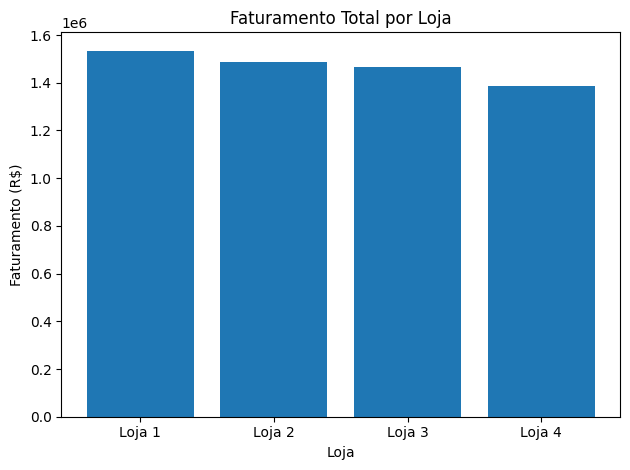

In [13]:
import matplotlib.pyplot as plt

plt.bar(df_faturamento["Loja"], df_faturamento["Faturamento"])
plt.title("Faturamento Total por Loja")
plt.xlabel("Loja")
plt.ylabel("Faturamento (R$)")
plt.tight_layout()
plt.show()

# 2. Vendas por Categoria


In [20]:
# 2. Vendas por Categoria

# Contando as vendas por categoria em cada loja
cat_loja1 = loja["Categoria do Produto"].value_counts().reset_index()
cat_loja2 = loja2["Categoria do Produto"].value_counts().reset_index()
cat_loja3 = loja3["Categoria do Produto"].value_counts().reset_index()
cat_loja4 = loja4["Categoria do Produto"].value_counts().reset_index()

# Renomeando colunas para exibição
cat_loja1.columns = ["Categoria", "Quantidade - Loja 1"]
cat_loja2.columns = ["Categoria", "Quantidade - Loja 2"]
cat_loja3.columns = ["Categoria", "Quantidade - Loja 3"]
cat_loja4.columns = ["Categoria", "Quantidade - Loja 4"]

# Exibindo a contagem da Loja 1
print("Loja 1 - Vendas por Categoria")
display(categorias_loja1)

# Exibe o resultado da Loja 2
print("Loja 2 - Vendas por Categoria")
display(categorias_loja2)

# Exibe o resultado da Loja 3
print("Loja 3 - Vendas por Categoria")
display(categorias_loja3)

# Exibe o resultado da Loja 4
print("Loja 4 - Vendas por Categoria")
display(categorias_loja4)

Loja 1 - Vendas por Categoria


,Categoria,Quantidade Vendida - Loja 1
0,moveis,465
1,eletronicos,448
2,brinquedos,324
3,eletrodomesticos,312
4,esporte e lazer,284
5,instrumentos musicais,182
6,livros,173
7,utilidades domesticas,171


Loja 2 - Vendas por Categoria


,Categoria,Quantidade Vendida - Loja 2
0,moveis,442
1,eletronicos,422
2,brinquedos,313
3,eletrodomesticos,305
4,esporte e lazer,275
5,instrumentos musicais,224
6,livros,197
7,utilidades domesticas,181


Loja 3 - Vendas por Categoria


,Categoria,Quantidade Vendida - Loja 3
0,moveis,499
1,eletronicos,451
2,brinquedos,315
3,eletrodomesticos,278
4,esporte e lazer,277
5,livros,185
6,instrumentos musicais,177
7,utilidades domesticas,177


Loja 4 - Vendas por Categoria


,Categoria,Quantidade Vendida - Loja 4
0,moveis,480
1,eletronicos,451
2,brinquedos,338
3,esporte e lazer,277
4,eletrodomesticos,254
5,utilidades domesticas,201
6,livros,187
7,instrumentos musicais,170


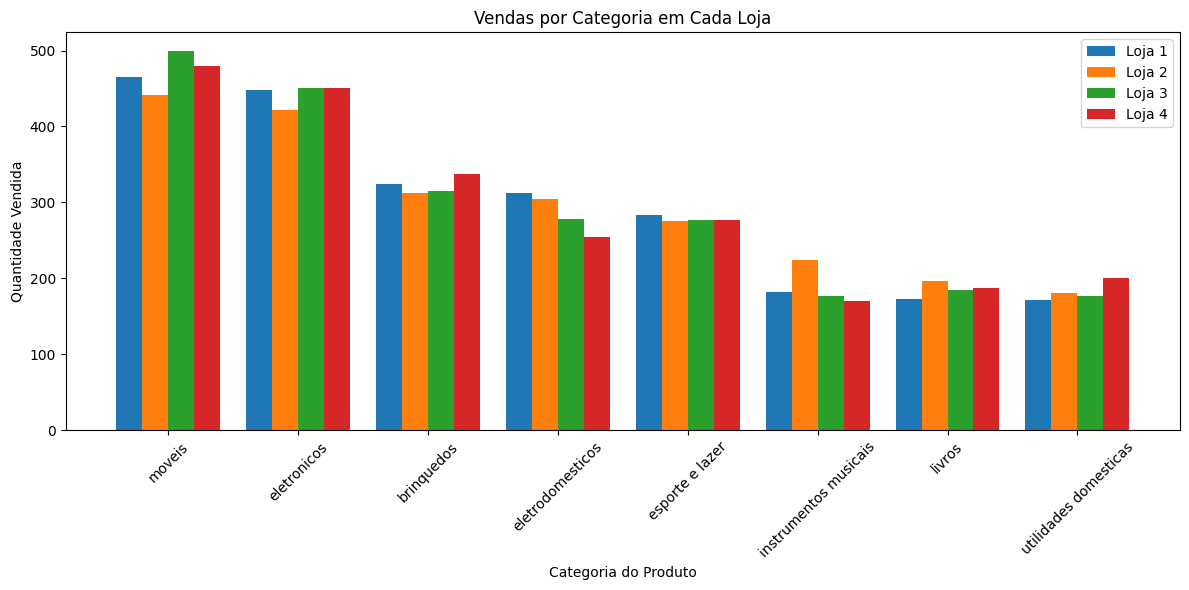

In [23]:
import matplotlib.pyplot as plt

# Unificando os dados em um único DataFrame para facilitar a comparação
df_categorias = categorias_loja1.merge(
    categorias_loja2, on="Categoria", how="outer"
).merge(
    categorias_loja3, on="Categoria", how="outer"
).merge(
    categorias_loja4, on="Categoria", how="outer"
)

# Substituindo valores nulos por 0 e ordenando pelas vendas da Loja 1
df_categorias.fillna(0, inplace=True)
df_categorias = df_categorias.sort_values(by="Quantidade Vendida - Loja 1", ascending=False)

# Configuração do gráfico
plt.figure(figsize=(12, 6))
largura = 0.2
x = range(len(df_categorias))

plt.bar([p - 1.5*largura for p in x], df_categorias["Quantidade Vendida - Loja 1"], width=largura, label="Loja 1")
plt.bar([p - 0.5*largura for p in x], df_categorias["Quantidade Vendida - Loja 2"], width=largura, label="Loja 2")
plt.bar([p + 0.5*largura for p in x], df_categorias["Quantidade Vendida - Loja 3"], width=largura, label="Loja 3")
plt.bar([p + 1.5*largura for p in x], df_categorias["Quantidade Vendida - Loja 4"], width=largura, label="Loja 4")

plt.xticks(ticks=x, labels=df_categorias["Categoria"], rotation=45)
plt.title("Vendas por Categoria em Cada Loja")
plt.xlabel("Categoria do Produto")
plt.ylabel("Quantidade Vendida")
plt.legend()
plt.tight_layout()
plt.show()

# 3. Média de Avaliação das Lojas

In [31]:
# Calculando a média das avaliações de cada loja
media_avaliacoes = {
    "Loja 1": loja["Avaliação da compra"].mean(),
    "Loja 2": loja2["Avaliação da compra"].mean(),
    "Loja 3": loja3["Avaliação da compra"].mean(),
    "Loja 4": loja4["Avaliação da compra"].mean()
}

# Transformando em DataFrame para visualização
df_media_avaliacoes = pd.DataFrame(
    list(media_avaliacoes.items()),
    columns=["Loja", "Média de Avaliação"]
)

# Ordenando da maior para a menor média
df_media_avaliacoes = df_media_avaliacoes.sort_values(
    by="Média de Avaliação", ascending=False
)

# Exibindo o resultado
print(df_media_avaliacoes)

     Loja  Média de Avaliação
2  Loja 3            4.048326
1  Loja 2            4.037304
3  Loja 4            3.995759
0  Loja 1            3.976685


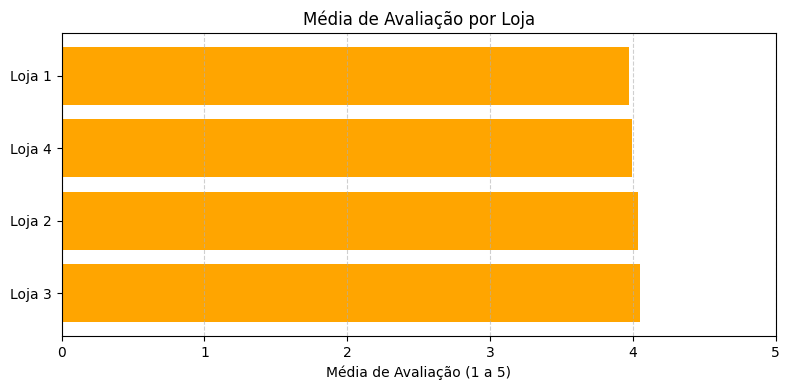

In [44]:
# Gráfico de Barras Horizontais - Média de Avaliação por Loja

plt.figure(figsize=(8, 4))
plt.barh(df_media_avaliacoes["Loja"], df_media_avaliacoes["Média de Avaliação"], color="orange")
plt.title("Média de Avaliação por Loja")
plt.xlabel("Média de Avaliação (1 a 5)")
plt.xlim(0, 5)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# 4. Produtos Mais e Menos Vendidos

In [34]:
# Produtos mais vendidos (top 5) e menos vendidos (bottom 5) por loja
# A função value_counts() conta quantas vezes cada produto aparece

# Loja 1
mais_vendidos_loja1 = loja["Produto"].value_counts().head(5).reset_index()
menos_vendidos_loja1 = loja["Produto"].value_counts().tail(5).reset_index()

# Loja 2
mais_vendidos_loja2 = loja2["Produto"].value_counts().head(5).reset_index()
menos_vendidos_loja2 = loja2["Produto"].value_counts().tail(5).reset_index()

# Loja 3
mais_vendidos_loja3 = loja3["Produto"].value_counts().head(5).reset_index()
menos_vendidos_loja3 = loja3["Produto"].value_counts().tail(5).reset_index()

# Loja 4
mais_vendidos_loja4 = loja4["Produto"].value_counts().head(5).reset_index()
menos_vendidos_loja4 = loja4["Produto"].value_counts().tail(5).reset_index()

# Renomeando colunas para melhor leitura
for df in [mais_vendidos_loja1, menos_vendidos_loja1,
           mais_vendidos_loja2, menos_vendidos_loja2,
           mais_vendidos_loja3, menos_vendidos_loja3,
           mais_vendidos_loja4, menos_vendidos_loja4]:
    df.columns = ["Produto", "Quantidade Vendida"]

# Exibindo os resultados de cada Loja
print("Top 5 produtos mais vendidos - Loja 1")
display(mais_vendidos_loja1)

print("Top 5 produtos menos vendidos - Loja 1")
display(menos_vendidos_loja1)

print("Top 5 produtos mais vendidos - Loja 2")
display(mais_vendidos_loja2)

print("Top 5 produtos menos vendidos - Loja 2")
display(menos_vendidos_loja2)

print("Top 5 produtos mais vendidos - Loja 3")
display(mais_vendidos_loja3)

print("Top 5 produtos menos vendidos - Loja 3")
display(menos_vendidos_loja3)

print("Top 5 produtos mais vendidos - Loja 4")
display(mais_vendidos_loja4)

print("Top 5 produtos menos vendidos - Loja 4")
display(menos_vendidos_loja4)

Top 5 produtos mais vendidos - Loja 1


,Produto,Quantidade Vendida
0,Micro-ondas,60
1,TV Led UHD 4K,60
2,Guarda roupas,60
3,Secadora de roupas,58
4,Cômoda,56


Top 5 produtos menos vendidos - Loja 1


,Produto,Quantidade Vendida
0,Ciência de dados com python,39
1,Pandeiro,36
2,Panela de pressão,35
3,Headset,33
4,Celular ABXY,33


Top 5 produtos mais vendidos - Loja 2


,Produto,Quantidade Vendida
0,Iniciando em programação,65
1,Micro-ondas,62
2,Bateria,61
3,Violão,58
4,Pandeiro,58


Top 5 produtos menos vendidos - Loja 2


,Produto,Quantidade Vendida
0,Fone de ouvido,37
1,Poltrona,35
2,Mesa de jantar,34
3,Impressora,34
4,Jogo de tabuleiro,32


Top 5 produtos mais vendidos - Loja 3


,Produto,Quantidade Vendida
0,Kit banquetas,57
1,Mesa de jantar,56
2,Cama king,56
3,Jogo de panelas,55
4,Cômoda,55


Top 5 produtos menos vendidos - Loja 3


,Produto,Quantidade Vendida
0,Guitarra,38
1,Jogo de copos,36
2,Mochila,36
3,Micro-ondas,36
4,Blocos de montar,35


Top 5 produtos mais vendidos - Loja 4


,Produto,Quantidade Vendida
0,Cama box,62
1,Faqueiro,59
2,Dashboards com Power BI,56
3,Cama king,56
4,Carrinho controle remoto,55


Top 5 produtos menos vendidos - Loja 4


,Produto,Quantidade Vendida
0,Geladeira,38
1,Ciência de dados com python,38
2,Violão,37
3,Guarda roupas,34
4,Guitarra,33


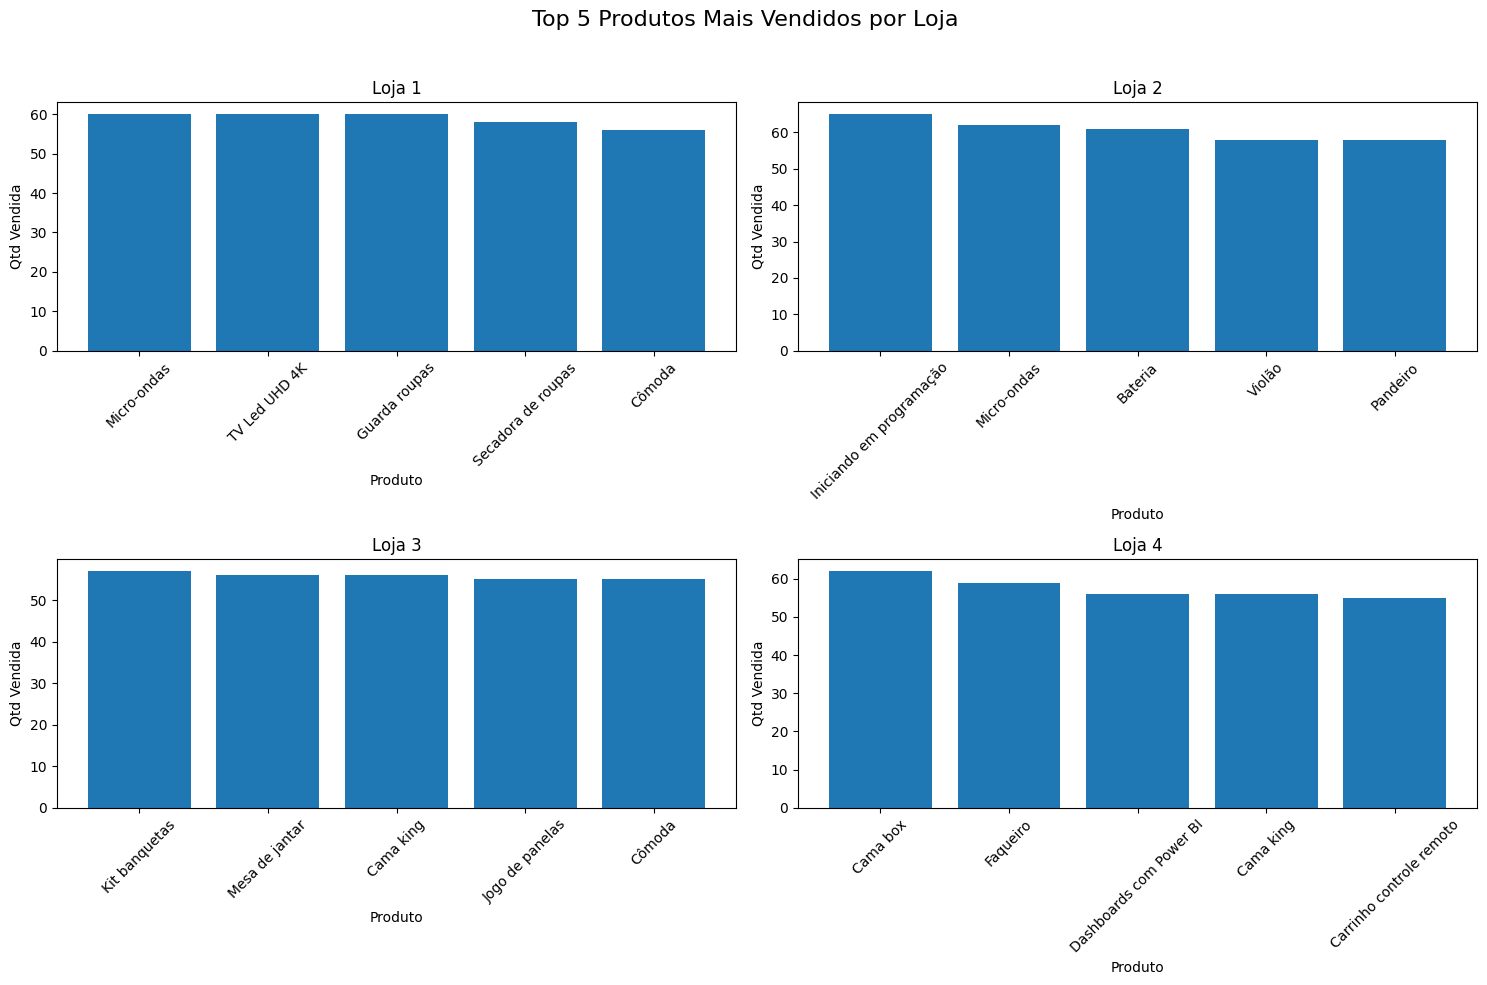

In [37]:
# Gráfico de barras - Top 5 Produtos Mais Vendidos da Loja 1
# plt.figure(figsize=(10, 5))
# plt.bar(mais_vendidos_loja1["Produto"], mais_vendidos_loja1["Quantidade Vendida"])
# plt.title("Top 5 Produtos Mais Vendidos - Loja 1")
# plt.xlabel("Produto")
# plt.ylabel("Quantidade Vendida")
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

# Gráfico comparativo - Top 5 Produtos Mais Vendidos por Loja

import matplotlib.pyplot as plt

# Criando 4 subplots para as 4 lojas
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle("Top 5 Produtos Mais Vendidos por Loja", fontsize=16)

# Loja 1
axs[0, 0].bar(mais_vendidos_loja1["Produto"], mais_vendidos_loja1["Quantidade Vendida"])
axs[0, 0].set_title("Loja 1")
axs[0, 0].set_xlabel("Produto")
axs[0, 0].set_ylabel("Qtd Vendida")
axs[0, 0].tick_params(axis='x', rotation=45)

# Loja 2
axs[0, 1].bar(mais_vendidos_loja2["Produto"], mais_vendidos_loja2["Quantidade Vendida"])
axs[0, 1].set_title("Loja 2")
axs[0, 1].set_xlabel("Produto")
axs[0, 1].set_ylabel("Qtd Vendida")
axs[0, 1].tick_params(axis='x', rotation=45)

# Loja 3
axs[1, 0].bar(mais_vendidos_loja3["Produto"], mais_vendidos_loja3["Quantidade Vendida"])
axs[1, 0].set_title("Loja 3")
axs[1, 0].set_xlabel("Produto")
axs[1, 0].set_ylabel("Qtd Vendida")
axs[1, 0].tick_params(axis='x', rotation=45)

# Loja 4
axs[1, 1].bar(mais_vendidos_loja4["Produto"], mais_vendidos_loja4["Quantidade Vendida"])
axs[1, 1].set_title("Loja 4")
axs[1, 1].set_xlabel("Produto")
axs[1, 1].set_ylabel("Qtd Vendida")
axs[1, 1].tick_params(axis='x', rotation=45)

# Ajuste do layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# 5. Frete Médio por Loja


In [40]:
# 8. Frete Médio por Loja

# Calculando o custo médio de frete para cada loja
frete_medio = {
    "Loja 1": loja["Frete"].mean(),
    "Loja 2": loja2["Frete"].mean(),
    "Loja 3": loja3["Frete"].mean(),
    "Loja 4": loja4["Frete"].mean()
}

# Transformando em DataFrame para visualização
df_frete_medio = pd.DataFrame(
    list(frete_medio.items()),
    columns=["Loja", "Frete Médio (R$)"]
)

# Ordenando do maior para o menor
df_frete_medio = df_frete_medio.sort_values(
    by="Frete Médio (R$)", ascending=False
)

# Exibindo o resultado
print(df_frete_medio)

     Loja  Frete Médio (R$)
0  Loja 1         34.691805
1  Loja 2         33.621941
2  Loja 3         33.074464
3  Loja 4         31.278997


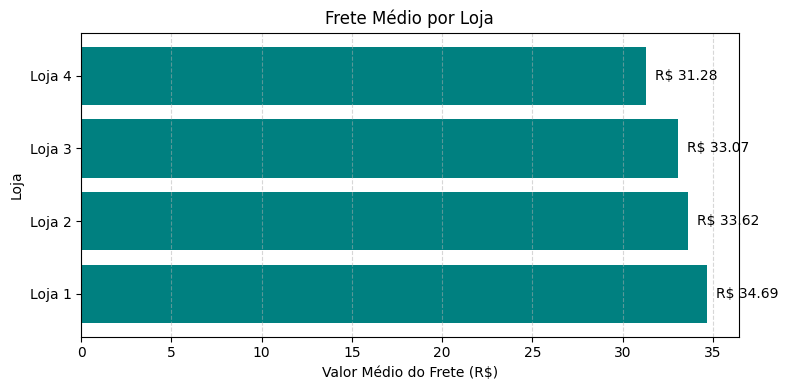

In [48]:
# Gráfico de barras horizontais - Frete Médio por Loja

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.barh(df_frete_medio["Loja"], df_frete_medio["Frete Médio (R$)"], color="teal")
plt.title("Frete Médio por Loja")
plt.xlabel("Valor Médio do Frete (R$)")
plt.ylabel("Loja")
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Adicionando os valores ao lado das barras
for index, value in enumerate(df_frete_medio["Frete Médio (R$)"]):
    plt.text(
        value + 0.5,                            # posição no eixo x (levemente à direita da barra)
        index,                                  # posição no eixo y
        f"R$ {value:.2f}",                      # formato em reais com duas casas decimais
        va='center',                            # alinhamento vertical
        fontsize=10
    )

plt.tight_layout()
plt.show()

# 6. Relatório Final

# 📊 Recomendação de Venda de Loja

## 🧭 Introdução

O objetivo deste relatório é auxiliar o Senhor João, proprietário da rede Alura Store, na decisão estratégica de **vender uma de suas quatro lojas**. Com base na análise de dados de vendas, avaliações de clientes e custos logísticos, buscamos identificar a loja com **menor eficiência geral**, a fim de maximizar o desempenho da rede como um todo.

Foram analisados os seguintes critérios:
- Faturamento total
- Categorias de produtos mais vendidas
- Média das avaliações de clientes
- Produtos mais e menos vendidos
- Custo médio de frete

## 📈 Desenvolvimento da Análise

### 💰 **Faturamento Total**
A **Loja 1** apresentou o maior faturamento, seguida por Loja 2, Loja 3 e **Loja 4** (que teve o menor). Isso indica que a Loja 4 possui menor desempenho de vendas.

### 🛒 **Categorias de Produtos Vendidas**
Todas as lojas têm como destaque as categorias **móveis, eletrônicos e eletrodomésticos**, com pequenas variações. No entanto, a **Loja 4** mostrou menor diversidade no volume de vendas entre categorias.

### ⭐ **Média de Avaliação dos Clientes**
A Loja 1 também se destaca com a **maior média de avaliação**, refletindo maior satisfação dos clientes. Por outro lado, a **Loja 4** obteve a **pior média**, indicando potenciais problemas de experiência do consumidor.

### 🏆 **Produtos Mais e Menos Vendidos**
- A Loja 1 vendeu consistentemente produtos com boa rotatividade como **TV Led 4K, micro-ondas e guarda-roupas**.
- A Loja 4 teve produtos com vendas bem mais baixas, o que pode indicar menor popularidade ou visibilidade dos itens ofertados.

### 🚚 **Frete Médio**
A **Loja 4 apresentou o menor frete médio**, o que seria um ponto positivo. No entanto, esse custo menor **não foi suficiente** para compensar a baixa performance de vendas e satisfação do cliente.

## ✅ Conclusão e Recomendação

Com base em todos os fatores analisados, **recomendamos que o Senhor João venda a Loja 4**. A decisão é justificada por:

- **Menor faturamento entre todas as lojas**
- **Pior média de avaliações de clientes**
- **Produtos com baixa performance de venda**
- **Menor destaque nas categorias de alto giro**

Apesar do frete médio mais baixo, os dados sugerem que a Loja 4 apresenta **baixa eficiência comercial e operacional**, o que torna essa unidade a mais adequada para descontinuação ou venda.

Com a venda da Loja 4, o Senhor João poderá focar seus recursos e esforços nas lojas com maior potencial de crescimento, otimizando os resultados da rede como um todo.
